In [ ]:
# !mamba install ocetrac

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/ocetrac_logo_transparent.png" width=300/>
    <h4><span style="font:tradegothic; color:gray">Morphological image processing for monitoring ocean temperature extremes</span></h4>
    <hr>
</div>
<div align="center">
    <h4><span style="font:tradegothic; color:purple">Hillary Scannell<sup>1</sup></span><span style="font:tradegothic; style=color:black">, Ryan Abernathey<sup>1</sup>, Julius Busecke<sup>1</sup></span>, David John Gagne<sup>2</sup>, <br>LuAnne Thompson<sup>3</sup>, and Daniel Whitt<sup>4</sup></h4>
    <h6><span style="font:tradegothic; color:gray"><sup>1</sup>Lamont-Doherty Earth Observatory, Columbia University, Palisades, NY, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>2</sup>National Center for Atmospheric Research, Boulder, CO, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>3</sup>School of Oceanography, University of Washington, Seattle, WA, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>4</sup>NASA Ames Research Center, Mountain View, CA, USA</span></h6>
</div>
<br>
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2>Abstract</h2>
     <hr>
</div>
Dangerous hot-water events, called marine heatwaves, cause prolonged periods of thermal stress in the marine environment that can lead to widespread coral bleaching, harmful algal blooms, unproductive fisheries, and even economic loss. Anticipating the paths of destructive marine heatwaves remains a challenge owing to the complex spatiotemporal evolution of these events. We present a novel open source package called Ocetrac that implements morphological image processing and tracking to aid in the analysis of marine heatwave detection and movement. We discuss how this approach can be applied to monitor other extreme ocean conditions, such as deoxygenation and acidification.
<br>
<div align="center">
    <img src="./images/title_footer.png" width=100%/>
</div>
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/warming_trend_space.png" width=150%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/trend_as_map.png" width=150%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Many species can cope with natural temperature fluctuations</span></h2>
    <img src="./images/natural_temp.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/migratory.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">As temperatures rise, heat extremes become more deadly</span></h2>
    <img src="./images/anthropogenic_temp.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/impacts.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">We define these hot water events as <b>Marine Heatwaves<b></span></h2>
    <img src="./images/mhw_explanation.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Marine heatwaves occur throughout the global ocean</span></h2>
    <img src="./images/Frolicher_Laufkotter.png" width=100%/>
</div>

In [ ]:
from IPython.display import HTML

In [ ]:
%%HTML 
<video controls autoplay width="100%" height="100%" stype="float">
  <source src="./video/sst_pos.mp4" type="video/mp4">
</video>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left" style="font-size:30px;">
    <h3>Motivation</h3>
     <hr>
</div>
<div align="left" style="font-size:20px;">
    <ul>
      <li>Marine heatwaves don't stay in one place.</li> 
      <li>They have complex spatial connectivity and temporal behavior.</li>
      <li>Local analyses may not completely characterize the evolution of these events.</li> 
      <li>Can we build a tool to identify and track marine heatwaves?</li> 
    </ul> 
</div>



<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left" style="font-size:30px;">
    <h3>Goals of Ocetrac</h3>
     <hr>
</div>
<div align="left" style="font-size:20px;">
    <ol>
      <li>Identify marine heatwaves as 2D objects from sea surface temperature anomaly images.</li>
      <li>Track marine heatwave objects in both space and time. </li>
      <li>Create a new labeled dataset of marine heatwave events to better understand the evolution and patterns of marine heatwaves globally.</li>
    </ol> 
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/sst_globe.png" width=50%/>
    <h2><span style="font:futura; color:black">NOAA Optimum Interpolation Sea Surface Temperature (OISST) v2.1</span></h2>
    <h4><span style="font:futura; color:black">monthly means from September 1981–present</span></h4>
    <h4><span style="font:futura; color:black">0.25º longitude x 0.25º latitude grid</span></h4>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Data Preprocessing</span></h2>
    <h4><span style="font:futura; color:black">Compute Sea Surface Temperature Anomalies</span></h4>
    <h4><span style="font:futura; color:black">Extract only the extreme positive values that exceed some threshold <BR>(e.g., 90<sup>th</sup> percentile)</span></h4>
     <img src="./images/stacked_images.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<!-- <div align="center">
    <h2><span style="font:futura; color:black">Morphological Operations</span></h2>
    <img src="./images/mo_overview.png" width=90%/>
</div> -->

<img style="float: left;" src="./images/mo_overview.png" width=50%>

# Multidimensional Image Processing <span style="color:blue">[scipy.ndimage]</span>

- **CLOSING**: 
      - Dilates an image and then erodes the dilated image
      - Fills small holes within features 
    
    
- **OPENING**: 
      - Erodes an image and then dilates the eroded image
      - Eliminates small features 

<h1 style="align: center;"><img style="display: inline;" src="https://raw.githubusercontent.com/pangeo-data/branding/master/logo/v_small_pangeo_logo.png" width=30%> <img style="display: inline;" src="./images/pangeo_forge.png" width=15%></h1>

### Analysis-ready, Cloud-optimized Data
* NOAA OISST v2.1 dataset is on the Pangeo Forge Bucket on Open Storage Network backed by AWS
* Pangeo Forge transforms netCDF source files from NOAA into a zarr store
* Read more about Pangeo Forge: https://pangeo-forge.readthedocs.io/ 
* Want your dataset in the cloud? Submit a staged recipe issue: https://github.com/pangeo-forge/staged-recipes/issues

In [1]:
import s3fs
import xarray as xr

endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},) 

path = "Pangeo/pangeo-forge/noaa_oisst/v2.1-avhrr.zarr"
ds = xr.open_zarr(fs_osn.get_mapper(path), consolidated=True)

In [2]:
ds = ds.resample(time='MS').mean()
ds

,Array,Chunk
Bytes,1.98 GB,4.15 MB
Shape,"(478, 1, 720, 1440)","(1, 1, 720, 1440)"
Count,4524 Tasks,478 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.98 GB,4.15 MB
Shape,"(478, 1, 720, 1440)","(1, 1, 720, 1440)"
Count,4524 Tasks,478 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


# Create and Connect to Dask Distributed Cluster

In [3]:
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster() # new Dask cluster
cluster.adapt(minimum=1, maximum=30) # cluster will automatically resize itself based on the workload
cluster

In [4]:
client = Client(cluster) # creates a client so computations using Dask will be executed on the cluster.
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.a2a67c6fd7264e5bb0c508e34f73cf61 Dashboard: /services/dask-gateway/clusters/prod.a2a67c6fd7264e5bb0c508e34f73cf61/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left">
    <h2><span style="font:futura; color:black">Steps in Data Preprocessing:</span></h2>
    <ul>
      <li>Calculate the sea surface temperature (SST) anomaly as the daily SST minus the 1971-2020 climatological mean.</li> 
      <li>Define a threshold to identify marine heatwaves. We will use the 90<sup>th</sup> percentile computed across the entire dataset (1981-2021).</li>
      <li>Find where the SST anomalies exceed this threshold.</li> 
      <li>Convert the final query into a binary image for Ocetrac.</li> 
    </ul> 
    <img src="./images/oisst_anomaly.png" width=80%/>
</div>

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
plt.rc('font', size=20); plt.figure(figsize=(20,10)); ax = plt.axes(projection=ccrs.PlateCarree())
ds.anom.sel(time=('2014-03-01'), zlev=0).plot(transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap='RdBu_r', extend='both')
ax.coastlines(resolution='110m', color='black', linewidth=1); ax.add_feature(cfeature.LAND, facecolor='w'); 

In [6]:
import numpy as np
if ds.anom.chunks:
    ds['anom'] = ds.anom.chunk({'time': -1})

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left">
    <h2><span style="font:futura; color:black">Find where anomalies exceed the 90<sup>th</sup> percentile threshold</span></h2>
</div>

In [7]:
anom_threshold = ds.anom.quantile(.90, dim=('time'))
anom_mhw = ds.anom.where(ds.anom>=anom_threshold, other=np.nan).isel(zlev=0)

In [8]:
anom_mhw = anom_mhw.chunk({'time': 20})

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left">
    <h2><span style="font:futura; color:black">Convert the marine heatwave anomalies into a binary image</span></h2>
</div>


In [9]:
mhw_binary = anom_mhw.where(anom_mhw>0, other=0)
mhw_binary = mhw_binary.where(mhw_binary==0, other=1)

<div align="center">
    <img src="./images/binary_oisst.png" width=80%/>
</div>

In [10]:
%%time 
mhw_binary.load()

CPU times: user 2.92 s, sys: 2.9 s, total: 5.82 s
Wall time: 5min 29s


<xarray.DataArray 'anom' (time: 478, lat: 720, lon: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2021-06-01
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    zlev      float32 0.0
    quantile  float64 0.9

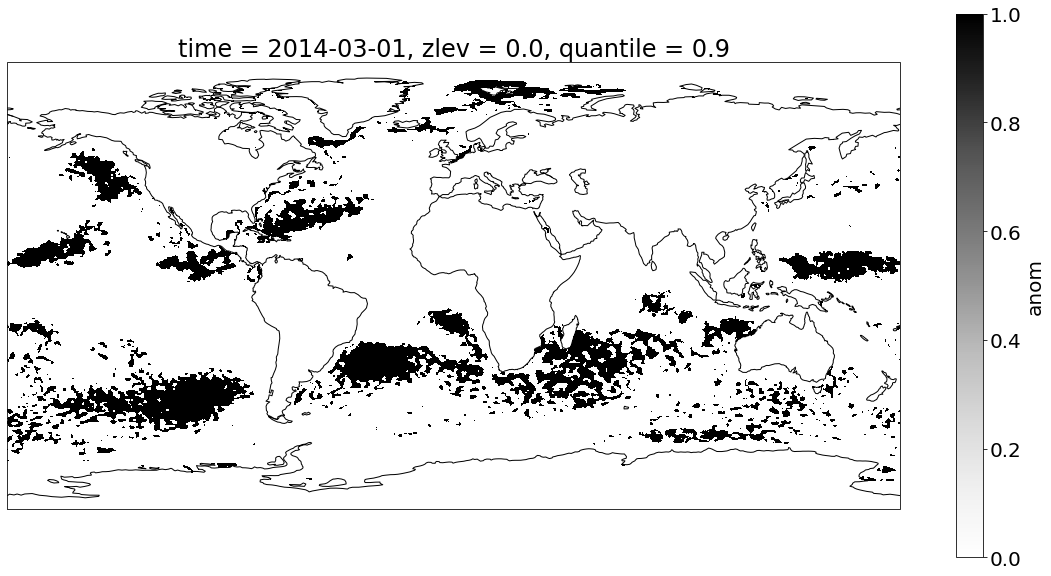

In [16]:
plt.rc('font', size=20); plt.figure(figsize=(20,10)); 
ax = plt.axes(projection=ccrs.PlateCarree())
mhw_binary.sel(time=('2014-03-01')).plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Greys')
ax.coastlines(resolution='110m', color='black', linewidth=1); ax.add_feature(cfeature.LAND, facecolor='w'); 

# How to use Ocetrac to identify and connect Marine Heatwave objects

In [11]:
# Define a land mask
mask = ds.sst.isel(time=0, zlev=0).fillna(-999)
mask = mask.where(mask==-999, other=1)
mask = mask.where(mask==1, other=0)

In [12]:
%%time
mask.load()

CPU times: user 358 ms, sys: 8.65 ms, total: 366 ms
Wall time: 1.19 s


<xarray.DataArray 'sst' (lat: 720, lon: 1440)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1981-09-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    zlev     float32 0.0

In [13]:
# Set model parameters
da = mhw_binary[:100,:,:]
radius = 8
min_size_quartile = 0.75
xdim = 'lon'
ydim = 'lat'

In [28]:
dat_slice = mhw_binary[:100,:,:]
date_slice.load();

In [29]:
import ocetrac.model as oce

Tracker =  oce.Tracker(date_slice, mask, radius, min_size_quartile, xdim, ydim)
blobs = Tracker.track()

minimum area:  1901.0
inital objects identified 	 1901
final objects tracked 	 194


In [31]:
from matplotlib.colors import ListedColormap
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

## Resulting Marine Heatwave Objects

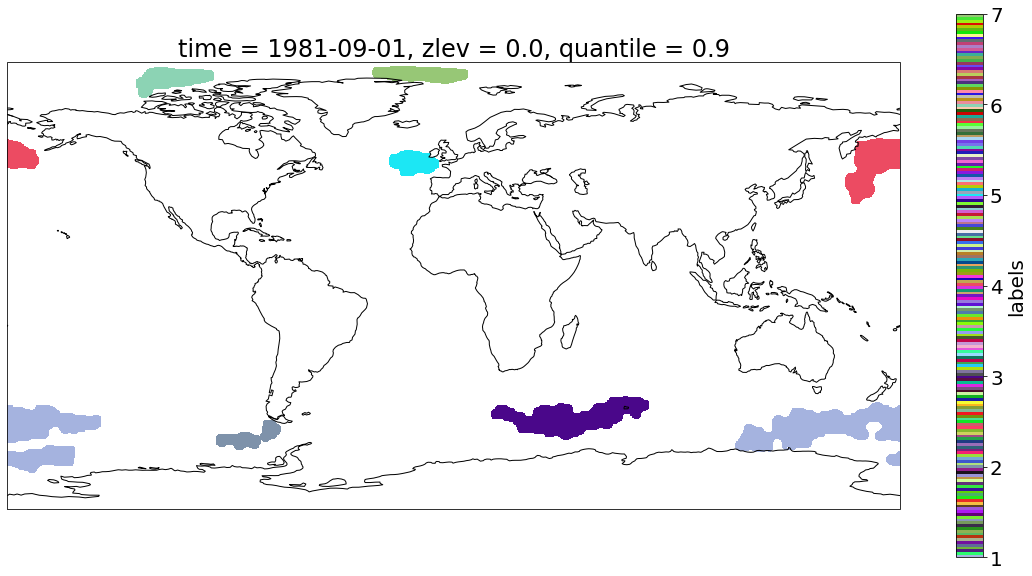

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature

maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

plt.rc('font', size=20); plt.figure(figsize=(20,10)); 
ax = plt.axes(projection=ccrs.PlateCarree())
blobs.isel(time=0).plot(transform=ccrs.PlateCarree(), cmap=cm)
ax.coastlines(resolution='110m', color='black', linewidth=1); ax.add_feature(cfeature.LAND, facecolor='w'); 

In [ ]:
# Feature Extraction

# Identify candidate points by eliminating those that do not satisfy a prescribed set of thresholds

# Object Detection

# Determine whether a closed contour exists around a cluster of candidate points.
# Remove small isolated clusters as well as fill small holes within larger clusters.
# Eliminate closed contour object that do no meet a prescribed size threshold

# Multiple Object Tracking

# Stitch connected objects in time, allowing them to split and merge
# Produce a new labeled dataset of marine heatwaves events